In [60]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_right_data.xlsx")

data


,FORCE_L,X_COR_L,Y_COR_L,COPX,COPY,FSR_L,FSRNONOISE_L,FSR_mass_L,FORCE_R,X_COR_R,Y_COR_R,COPX.1,COPY.1,FSR_R,FSRNONOISE_R,FSR_mass_R
0,0,NaN,NaN,5.575461,26.583173,24,0,0.0,0,NaN,NaN,5.575461,26.583173,26,0,0.0
1,0,NaN,NaN,5.578947,26.571607,24,0,0.0,0,NaN,NaN,5.578947,26.571607,27,0,0.0
2,0,NaN,NaN,5.584776,26.568425,26,0,0.0,0,NaN,NaN,5.584776,26.568425,24,0,0.0
3,0,NaN,NaN,5.575269,26.562586,28,0,0.0,0,NaN,NaN,5.575269,26.562586,22,0,0.0
4,0,NaN,NaN,5.583772,26.569648,26,0,0.0,0,NaN,NaN,5.583772,26.569648,24,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,NaN,NaN,5.935185,26.638889,29,0,0.0,0,NaN,NaN,5.935185,26.638889,29,0,0.0
863,0,NaN,NaN,5.940000,26.580000,27,0,0.0,0,NaN,NaN,5.940000,26.580000,30,0,0.0
864,0,NaN,NaN,6.000000,26.558140,25,0,0.0,0,NaN,NaN,6.000000,26.558140,31,0,0.0
865,0,NaN,NaN,5.607143,26.428571,25,0,0.0,0,NaN,NaN,5.607143,26.428571,33,0,0.0


In [61]:
data.isnull().sum()

FORCE_L           0
X_COR_L         388
Y_COR_L         629
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        1
FORCE_R           0
X_COR_R         358
Y_COR_R         358
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

In [62]:
data=data.drop(columns=['Y_COR_L','Y_COR_R'])
data.isnull().sum()

FORCE_L           0
X_COR_L         388
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        1
FORCE_R           0
X_COR_R         358
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

<Axes: >

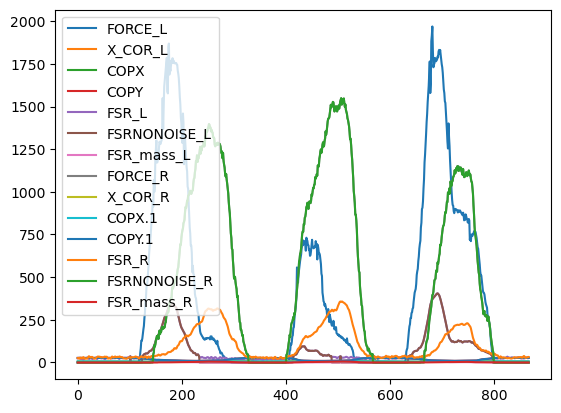

In [63]:
data.plot()

In [64]:
columns=data.columns
columns

Index(['FORCE_L', 'X_COR_L', 'COPX', 'COPY', 'FSR_L', 'FSRNONOISE_L',
       'FSR_mass_L', 'FORCE_R', 'X_COR_R', 'COPX.1', 'COPY.1', 'FSR_R',
       'FSRNONOISE_R', 'FSR_mass_R'],
      dtype='object')

In [65]:
for i in columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [66]:
data.isnull().sum()

FORCE_L         0
X_COR_L         0
COPX            0
COPY            0
FSR_L           0
FSRNONOISE_L    0
FSR_mass_L      0
FORCE_R         0
X_COR_R         0
COPX.1          0
COPY.1          0
FSR_R           0
FSRNONOISE_R    0
FSR_mass_R      0
dtype: int64

<Axes: >

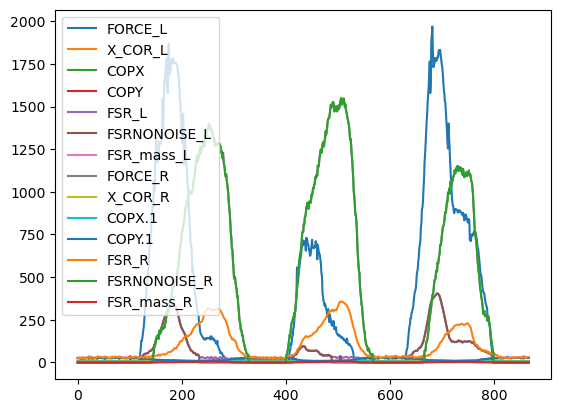

In [67]:
data.plot()

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [69]:
print(columns)

Index(['FORCE_L', 'X_COR_L', 'COPX', 'COPY', 'FSR_L', 'FSRNONOISE_L',
       'FSR_mass_L', 'FORCE_R', 'X_COR_R', 'COPX.1', 'COPY.1', 'FSR_R',
       'FSRNONOISE_R', 'FSR_mass_R'],
      dtype='object')


In [77]:

force=pd.concat([data.FORCE_L,data.FORCE_R],axis=1)

x_cor=pd.concat([data.X_COR_L,data.X_COR_R],axis=1)

fsr=pd.concat([data.FSR_L,data.FSR_R],axis=1)

fsr_noise=pd.concat([data.FSRNONOISE_L,data.FSRNONOISE_R],axis=1)

fsr_mass=pd.concat([data.FSR_mass_L,data.FSR_mass_R],axis=1)


print(fsr_mass)


    

     FSR_mass_L  FSR_mass_R
0      0.000000         0.0
1      0.000000         0.0
2      0.000000         0.0
3      0.000000         0.0
4      0.000000         0.0
..          ...         ...
862    0.000000         0.0
863    0.000000         0.0
864    0.000000         0.0
865    0.000000         0.0
866    0.878716         0.0

[867 rows x 2 columns]


Pandas computed Pearson r: 0.256165652344603
Scipy computed Pearson r: 0.2561656523446022 and p-value: 1.8585883398660955e-14


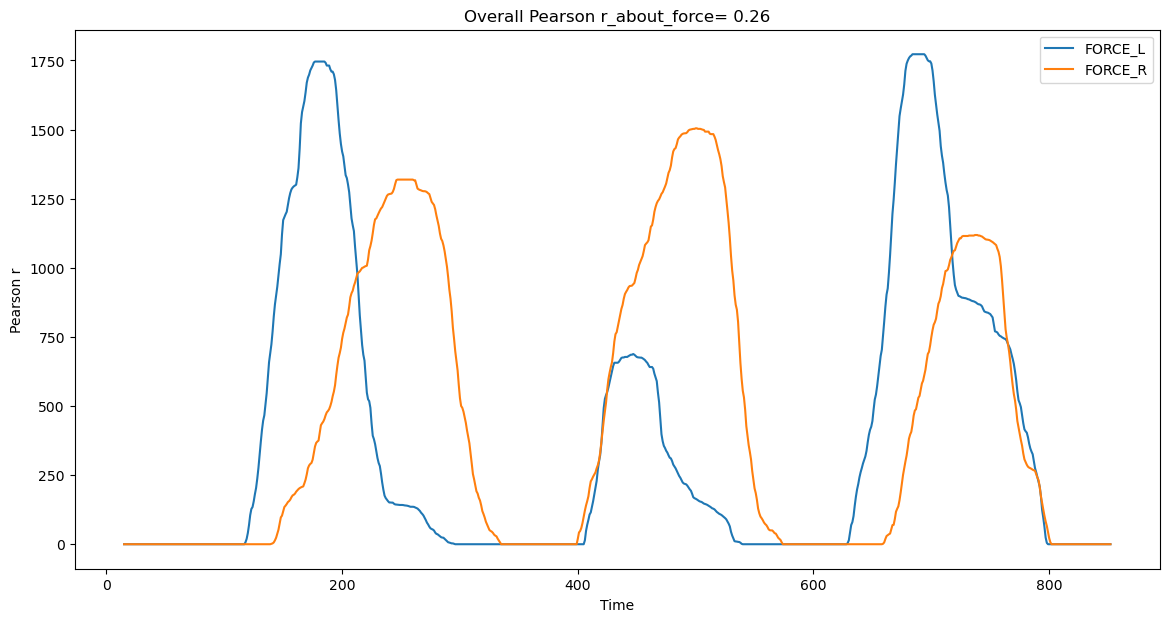

In [71]:
overall_pearson_r = force.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(force.dropna()['FORCE_L'],force.dropna()['FORCE_R'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(14,7))
force.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r_about_force= {np.round(overall_pearson_r,2)}");


Pandas computed Pearson r: 0.6392852912648677
Scipy computed Pearson r: 0.6392852912648663 and p-value: 8.676515739812406e-101


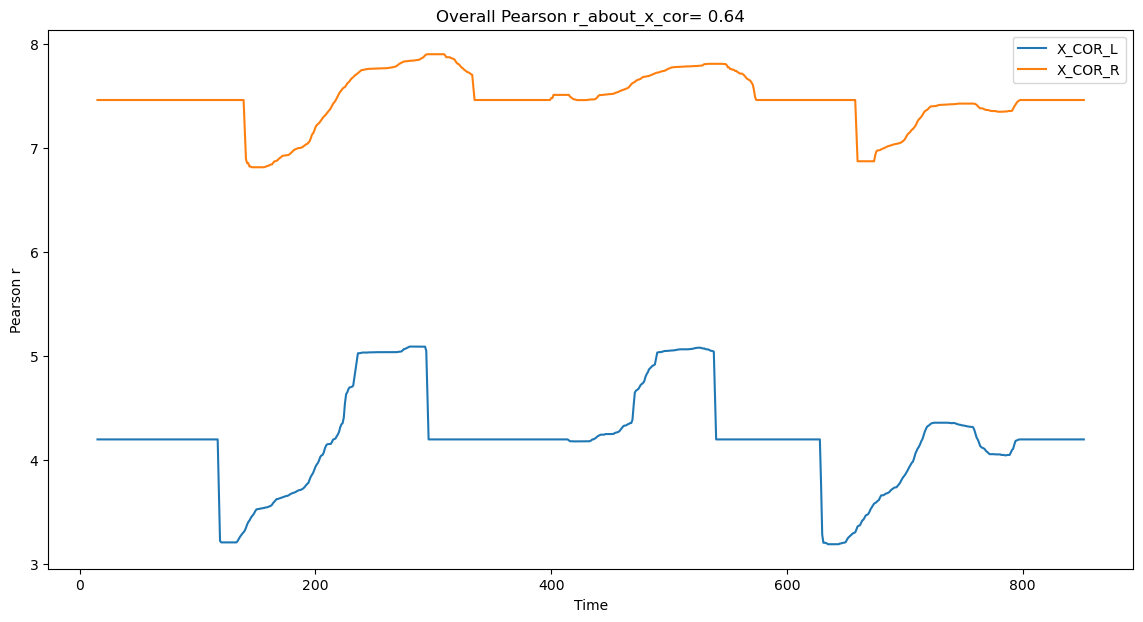

In [72]:
overall_pearson_r = x_cor.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(x_cor.dropna()['X_COR_L'],x_cor.dropna()['X_COR_R'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(14,7))
x_cor.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r_about_x_cor= {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: 0.022486409191948924
Scipy computed Pearson r: 0.022486409191948904 and p-value: 0.5084599327220098


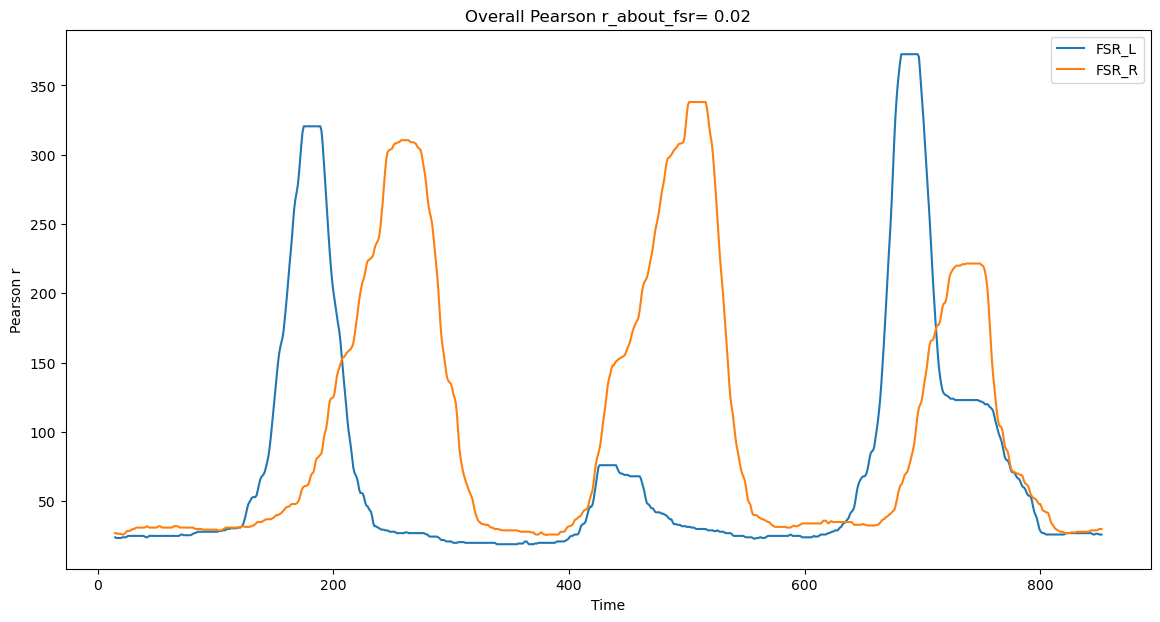

In [73]:
overall_pearson_r = fsr.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(fsr.dropna()['FSR_L'],fsr.dropna()['FSR_R'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(14,7))
fsr.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r_about_fsr= {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: 0.16002847677576648
Scipy computed Pearson r: 0.16002847677576623 and p-value: 2.1822398523171022e-06


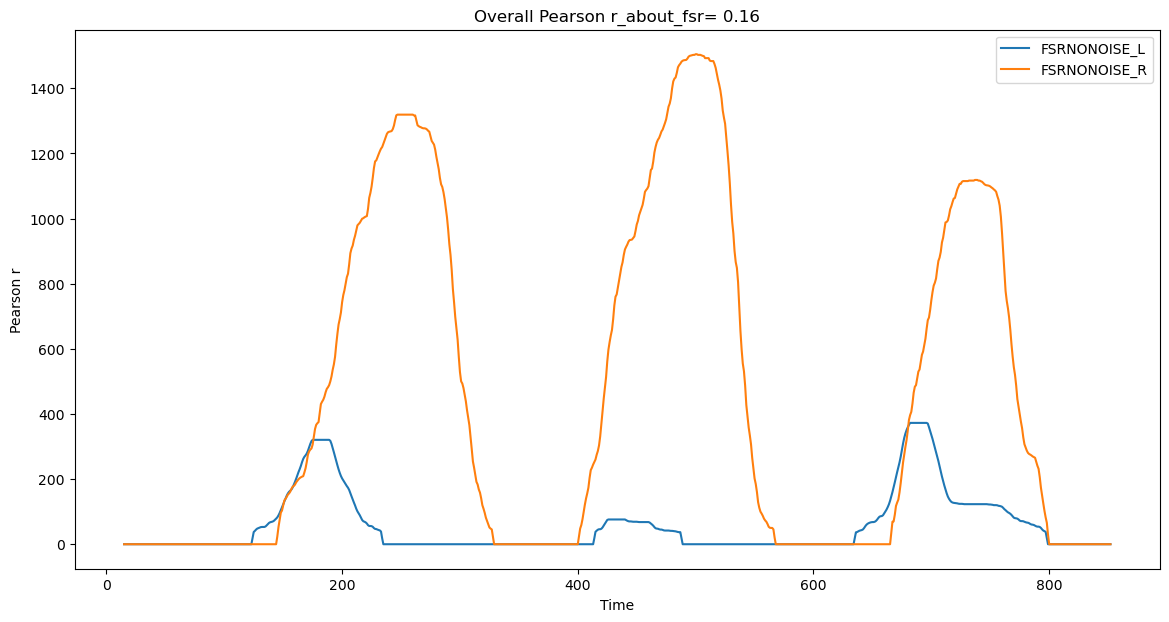

In [74]:
overall_pearson_r = fsr_noise.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(fsr_noise.dropna()['FSRNONOISE_L'],fsr_noise.dropna()['FSRNONOISE_R'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(14,7))
fsr_noise.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r_about_fsr= {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: 0.08763750993309172
Scipy computed Pearson r: 0.08763750993309072 and p-value: 0.009830919393396437


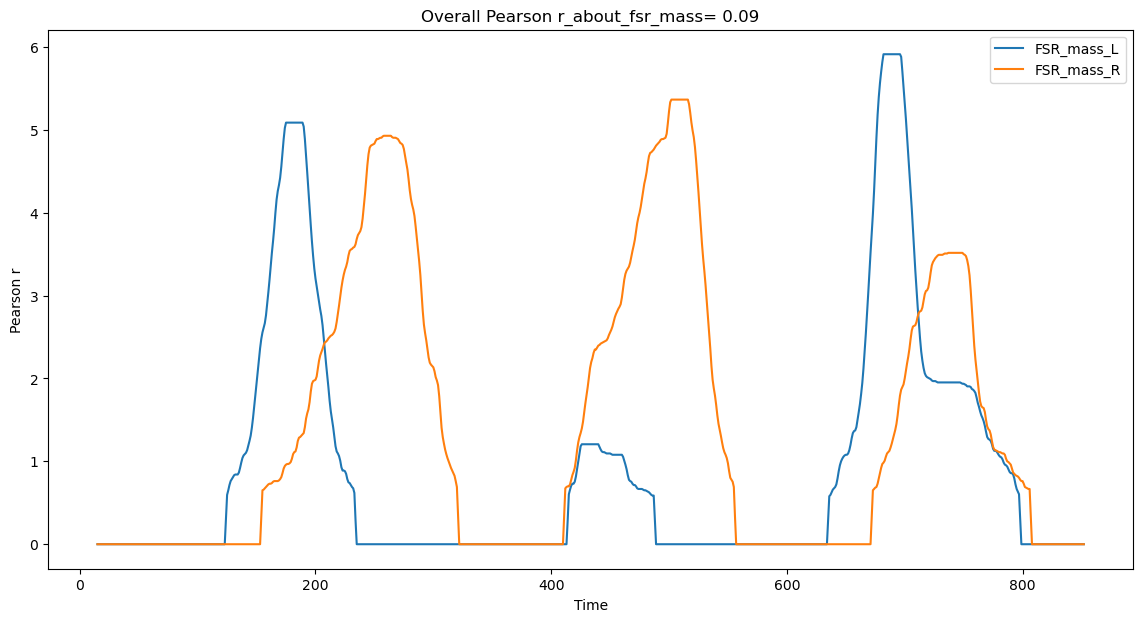

In [78]:
overall_pearson_r = fsr_mass.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(fsr_mass.dropna()['FSR_mass_L'],fsr_mass.dropna()['FSR_mass_R'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(14,7))
fsr_mass.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r_about_fsr_mass= {np.round(overall_pearson_r,2)}");


In [79]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_right_data.xlsx")

data

,FORCE_L,X_COR_L,Y_COR_L,COPX,COPY,FSR_L,FSRNONOISE_L,FSR_mass_L,FORCE_R,X_COR_R,Y_COR_R,COPX.1,COPY.1,FSR_R,FSRNONOISE_R,FSR_mass_R
0,0,NaN,NaN,5.575461,26.583173,24,0,0.0,0,NaN,NaN,5.575461,26.583173,26,0,0.0
1,0,NaN,NaN,5.578947,26.571607,24,0,0.0,0,NaN,NaN,5.578947,26.571607,27,0,0.0
2,0,NaN,NaN,5.584776,26.568425,26,0,0.0,0,NaN,NaN,5.584776,26.568425,24,0,0.0
3,0,NaN,NaN,5.575269,26.562586,28,0,0.0,0,NaN,NaN,5.575269,26.562586,22,0,0.0
4,0,NaN,NaN,5.583772,26.569648,26,0,0.0,0,NaN,NaN,5.583772,26.569648,24,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,NaN,NaN,5.935185,26.638889,29,0,0.0,0,NaN,NaN,5.935185,26.638889,29,0,0.0
863,0,NaN,NaN,5.940000,26.580000,27,0,0.0,0,NaN,NaN,5.940000,26.580000,30,0,0.0
864,0,NaN,NaN,6.000000,26.558140,25,0,0.0,0,NaN,NaN,6.000000,26.558140,31,0,0.0
865,0,NaN,NaN,5.607143,26.428571,25,0,0.0,0,NaN,NaN,5.607143,26.428571,33,0,0.0


In [80]:
columns=data.columns
columns

Index(['FORCE_L', 'X_COR_L', 'Y_COR_L', 'COPX', 'COPY', 'FSR_L',
       'FSRNONOISE_L', 'FSR_mass_L', 'FORCE_R', 'X_COR_R', 'Y_COR_R', 'COPX.1',
       'COPY.1', 'FSR_R', 'FSRNONOISE_R', 'FSR_mass_R'],
      dtype='object')

In [81]:
for i in columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [86]:
def crosscorr(datax, datay, lag=0, wrap=False):
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [88]:

force=pd.concat([data.FORCE_L,data.FORCE_R],axis=1)

x_cor=pd.concat([data.X_COR_L,data.X_COR_R],axis=1)

fsr=pd.concat([data.FSR_L,data.FSR_R],axis=1)

fsr_noise=pd.concat([data.FSRNONOISE_L,data.FSRNONOISE_R],axis=1)

fsr_mass=pd.concat([data.FSR_mass_L,data.FSR_mass_R],axis=1)



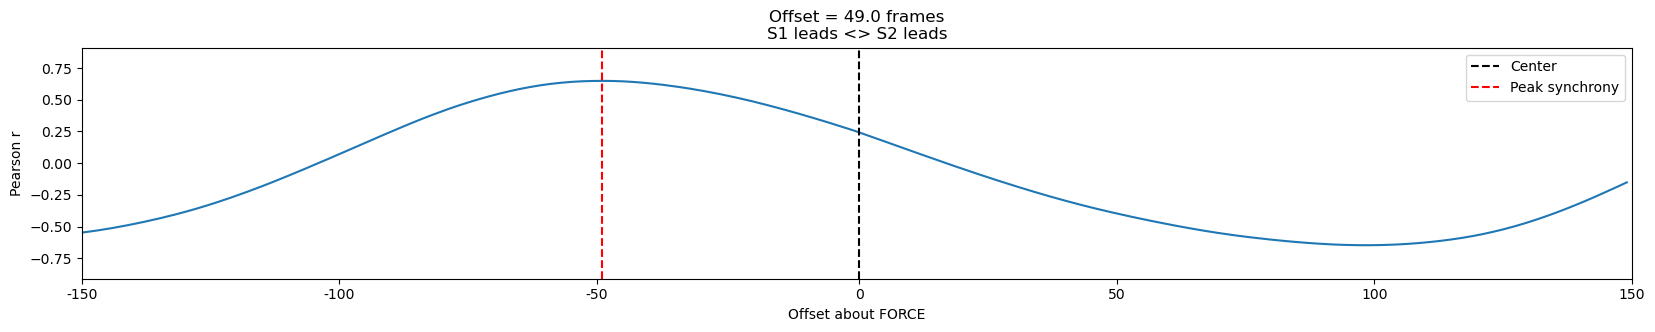

In [118]:
d1 = force['FORCE_L']
d2 = force['FORCE_R']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs) # 최대 correlation 값 가지는 offset 계산

f,ax=plt.subplots(figsize=(20,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.91,.91],xlim=[0,301], xlabel='Offset about FORCE',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [103]:
# offset이 -49임으로 FORCE_L이 리드하고 FORCE_R이 따라오는 것 -> FORCE_L이 선행 -> FORCE_L이 상관관계를 주도함

# Offset이 왼쪽에 있으면, S1이 리드하과 S2가 따라오는 것

# TLCC는 하나의 time-Series를 조금씩 shifiting 시키면서 데이터 전체 범위에 대하여 Pearson 상관 관계수를 계산하여 나타냄

# TLCC는 Pearson, Kendall Correlation과는 다르게 두 데이터 사이에서의 인과관계를 파악할 수 있음


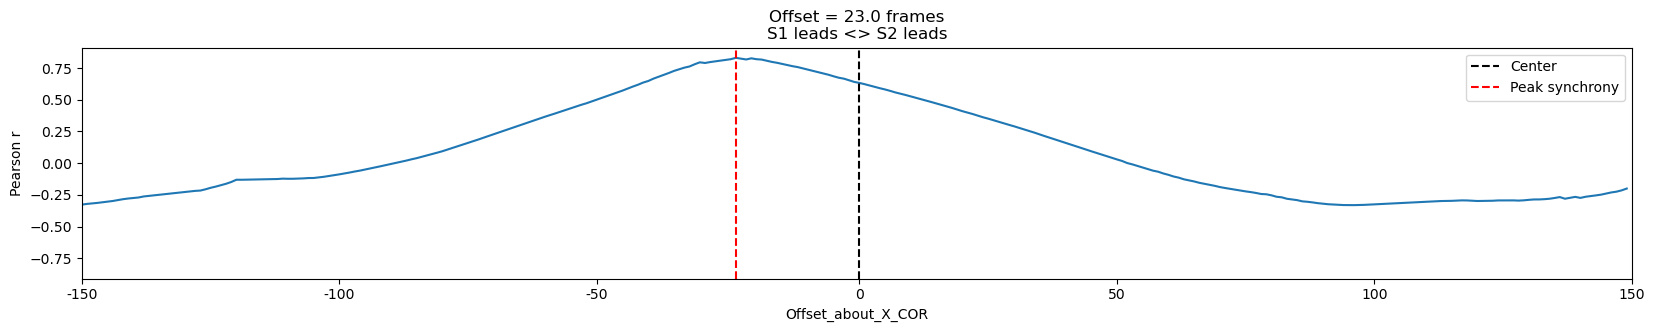

In [119]:
d1 = x_cor['X_COR_L']
d2 = x_cor['X_COR_R']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs) # 최대 correlation 값 가지는 offset 계산

f,ax=plt.subplots(figsize=(20,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.91,.91],xlim=[0,301], xlabel='Offset_about_X_COR',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

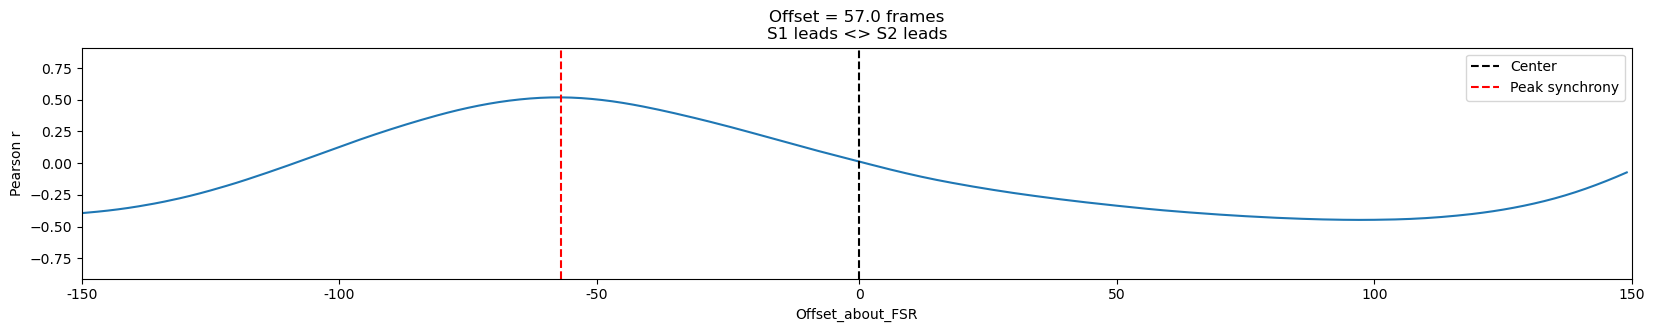

In [120]:
d1 = fsr['FSR_L']
d2 = fsr['FSR_R']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs) # 최대 correlation 값 가지는 offset 계산

f,ax=plt.subplots(figsize=(20,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.91,.91],xlim=[0,301], xlabel='Offset_about_FSR',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

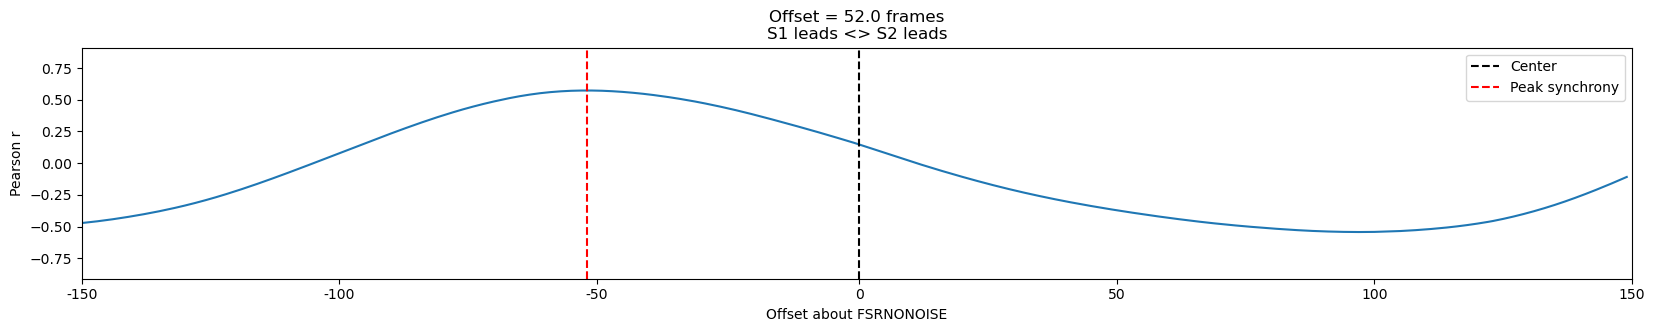

In [123]:
d1 = fsr_noise['FSRNONOISE_L']
d2 = fsr_noise['FSRNONOISE_R']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs) # 최대 correlation 값 가지는 offset 계산

f,ax=plt.subplots(figsize=(20,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.91,.91],xlim=[0,301], xlabel='Offset about FSRNONOISE',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

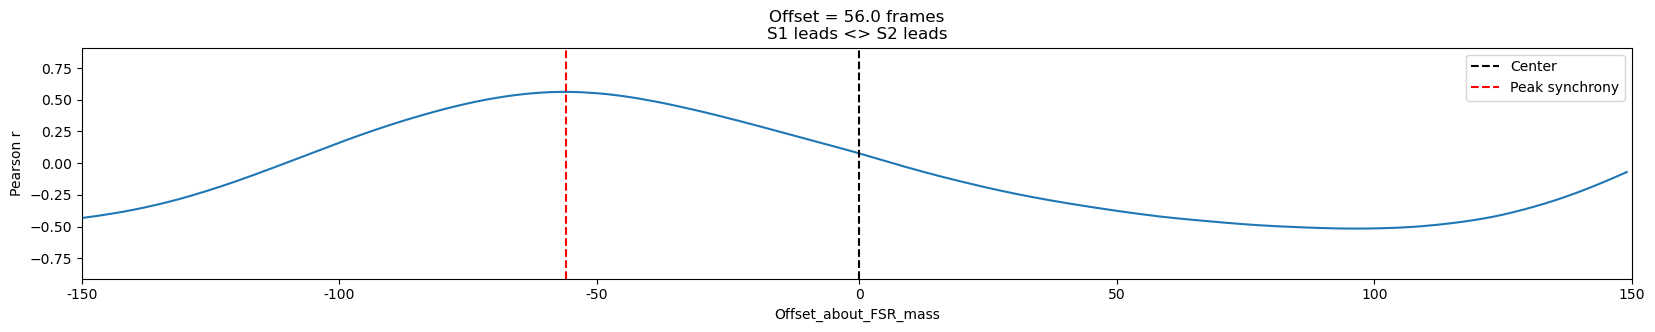

In [124]:
d1 = fsr_mass['FSR_mass_L']
d2 = fsr_mass['FSR_mass_R']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs) # 최대 correlation 값 가지는 offset 계산

f,ax=plt.subplots(figsize=(20,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[-.91,.91],xlim=[0,301], xlabel='Offset_about_FSR_mass',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()